In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib
%matplotlib inline


In [33]:
plt.style.use('fivethirtyeight') # Plot style 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Liberation Sans' # Open sourse font closest to Helvetica

In [40]:
m = pd.read_csv("sensitivity/m.csv")
a = pd.read_csv("sensitivity/a.csv")
lj = pd.read_csv("sensitivity/lj.csv")
p = pd.read_csv("sensitivity/p.csv")
t = pd.read_csv("sensitivity/t.csv")
Ij = pd.read_csv("sensitivity/Ij.csv")

In [93]:
Sensitivity = pd.DataFrame({
    #"Index":m["m"],
    "m":m["obj"],
    "a":a["obj"],
    "lj":lj["obj"],
    "p":p["obj"],
    "t":t["obj"],
    "In_j":Ij["obj"]
})

In [91]:
Sensitivity = Sensitivity[:-1]
Sensitivity

,m,a,lj,p,t,Ins
0,0.000000,140719.292451,0.000000e+00,0.000000e+00,608092.194118,498774.727377
1,106395.144561,218414.766766,3.610840e+05,1.557584e+05,608092.194118,517903.889977
2,225344.459777,296350.252356,6.080922e+05,3.527627e+05,608092.194118,537201.784718
3,318179.635568,374285.737547,8.151222e+05,5.499283e+05,608092.194118,556893.564118
4,397083.678876,452221.222837,9.112942e+05,7.470939e+05,608092.194118,576585.342518
5,465115.484135,530156.708828,9.862990e+05,9.442596e+05,608092.194118,596277.127918
6,534073.314118,608092.194118,1.027101e+06,1.141425e+06,608092.194118,615968.907518
7,608092.194118,686027.679509,1.051757e+06,1.338591e+06,608092.194118,635660.687518


<Axes: >

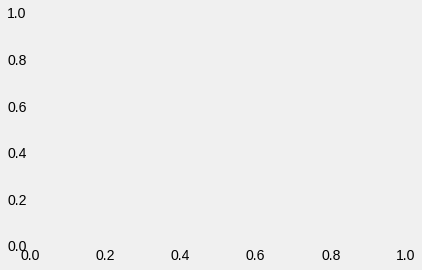

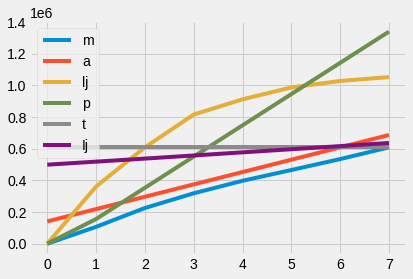

In [47]:
plt.grid()
Sensitivity.plot()

Text(1, 1405520, 'Musk-Model')

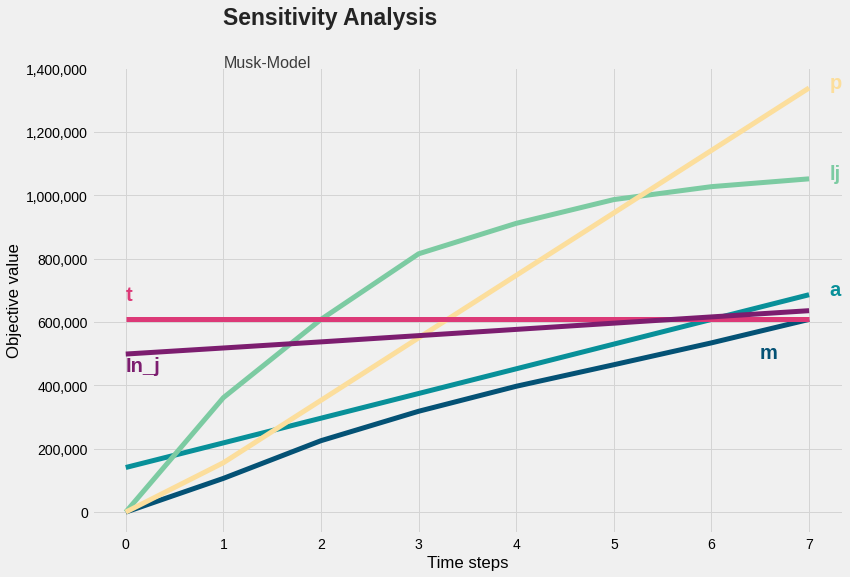

In [100]:
colors = {'m':'#045275', 'a':'#089099', 'lj':'#7CCBA2', \
'p':'#FCDE9C', 't':'#DC3977', 'In_j':'#7C1D6F'}

fig = plt.figure(figsize=(12, 8))
ax = fig.subplots(nrows=1, ncols=1)

Sensitivity.plot(color=list(colors.values()),linewidth=5, ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(color='#d4d4d4')
ax.set(xlabel='Time steps', ylabel='Objective value')
ax.legend().set_visible(False)

#Adding country names to corresponding curves
end = [-1,-1,-1,-1, 0, 0]
x = [0.90, 0.95, 0.95, 0.95, 0.9, 1.01]
y = [0.8, 1, 1, 1, 1.1, 0.7]
for country, options, margin_x, margin_y in zip(colors.keys(), end, x, y):
    ax.text(x=Sensitivity.index[options]**margin_x, y=Sensitivity[country].max()*margin_y, color=colors[country],\
            s=country, weight='heavy', size='x-large')
#Adding header
ax.text(x=Sensitivity.index[1], y=int(Sensitivity.max().max()+(0.15*Sensitivity.max().max())), \
s='Sensitivity Analysis', fontsize=23, weight='bold', alpha=0.85)

ax.text(x=Sensitivity.index[1], y=int(Sensitivity.max().max()+(0.05*Sensitivity.max().max())), \
    s='Musk-Model', fontsize=16, \
    alpha=0.75)


In [101]:
fig.savefig('covid1.png', transparent=False, dpi=300, bbox_inches='tight')